In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [2]:
%matplotlib inline

# Chapter 3: Data Prep

In [12]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

data=[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
series=Series(data)
values=series.values
values=values.reshape((len(values), 1))

scaler=MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

normalized=scaler.transform(values)
print(normalized)

inversed=scaler.inverse_transform(normalized)
print(inversed)

Min: 10.000000, Max: 100.000000
[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]
[[ 10.]
 [ 20.]
 [ 30.]
 [ 40.]
 [ 50.]
 [ 60.]
 [ 70.]
 [ 80.]
 [ 90.]
 [100.]]


In [14]:
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt

data=[1.0, 5.5, 9.0, 2.6, 8.8, 3.0, 4.1, 7.9, 6.3]
series=Series(data)
values=series.values
values=values.reshape((len(values),1))

scaler=StandardScaler()
scaler=scaler.fit(values)
print('Mean: %f, Std: %f' % (scaler.mean_, sqrt(scaler.var_)))

standardized=scaler.transform(values)
print(standardized)
inversed=scaler.inverse_transform(standardized)
print(inversed)

Mean: 5.355556, Std: 2.712568
[[-1.60569456]
 [ 0.05325007]
 [ 1.34354035]
 [-1.01584758]
 [ 1.26980948]
 [-0.86838584]
 [-0.46286604]
 [ 0.93802055]
 [ 0.34817357]]
[[1. ]
 [5.5]
 [9. ]
 [2.6]
 [8.8]
 [3. ]
 [4.1]
 [7.9]
 [6.3]]


In [21]:
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data=['cold', 'cold', 'warm','cold','hot','hot','warm','cold','warm','hot']
values=array(data)
print(values, end="")
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder=OneHotEncoder(sparse=False, categories='auto')
integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded=onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

inverted=label_encoder.inverse_transform([argmax(onehot_encoded[0,:])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot'][0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


In [30]:
from keras.preprocessing.sequence import pad_sequences

sequences=[[1,2,3,4],[1,2,3],[1]]

padded=pad_sequences(sequences)
print(padded, '\n')

padded_right=pad_sequences(sequences, padding='post')
print(padded_right, '\n')

truncated=pad_sequences(sequences, maxlen=2)
print(truncated, '\n')

truncated_right=pad_sequences(sequences, maxlen=2, truncating='post')
print(truncated_right)

[[1 2 3 4]
 [0 1 2 3]
 [0 0 0 1]] 

[[1 2 3 4]
 [1 2 3 0]
 [1 0 0 0]] 

[[3 4]
 [2 3]
 [0 1]] 

[[1 2]
 [1 2]
 [0 1]]


In [33]:
from pandas import DataFrame

df=DataFrame()
df['t']=[x for x in range(10)]
print(df)

df['t-1']=df['t'].shift(1)
print(df)

df['t+1']=df['t'].shift(-1)
print(df)

   t
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9
   t  t-1
0  0  NaN
1  1  0.0
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0
   t  t-1  t+1
0  0  NaN  1.0
1  1  0.0  2.0
2  2  1.0  3.0
3  3  2.0  4.0
4  4  3.0  5.0
5  5  4.0  6.0
6  6  5.0  7.0
7  7  6.0  8.0
8  8  7.0  9.0
9  9  8.0  NaN


# Ch 6: Original LSTM 1997

In [2]:
from random import randint
from numpy import array, argmax
from keras.models import Sequential
from keras.layers import LSTM, Dense

def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]

def one_hot_encode(sequence, n_features):
    encoding=list()
    for value in sequence:
        vector=[0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def generate_example(length, n_features, out_index):
    sequence=generate_sequence(length, n_features)
    encoded=one_hot_encode(sequence, n_features)
    X=encoded.reshape((1, length, n_features))
    y=encoded[out_index].reshape(1,n_features)
    return X, y

###
length=5
n_features=10
out_index=2

model=Sequential()
model.add(LSTM(25, input_shape=(length,n_features)))
model.add(Dense(n_features, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

for i in range(100):
    X,y=generate_example(length, n_features, out_index)
    model.fit(X,y, epochs=1, verbose=2)

correct=0
for i in range(100):
    X,y=generate_example(length, n_features, out_index)
    yhat=model.predict(X)
    if one_hot_decode(yhat)==one_hot_decode(y):
        correct+=1
    print('Accuracy: %f' % ((correct/100.0)*100.0))

X,y=generate_example(length,n_features,out_index)
yhat=model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                3600      
_________________________________________________________________
dense (Dense)                (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 2.4942 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.3253 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.2458 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.2726 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.3428 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.2731 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.3391 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.2989 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.3264 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.2542 - accuracy: 0.0000e+00
1/1 - 0s - loss: 2.3624 - accuracy: 0.0000e+00

# Chapter 7: Stacked LSTM  Sine Wave

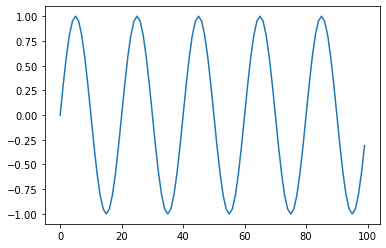

In [6]:
%matplotlib inline

from math import sin
from math import pi
from matplotlib import pyplot

length=100
freq=5
sequence=[sin(2*pi*freq*(i/float(length))) for i in range(length)]
pyplot.plot(sequence)
pyplot.show()

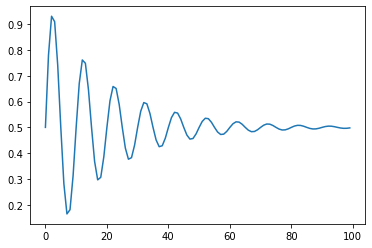

In [7]:
#Create decaying sine wave function to predict:

from math import sin, pi, exp
from matplotlib import pyplot
length=100
period=10
decay=0.05
sequence=[0.5+0.5*sin(2*pi*i/period) * exp(-decay*i) for i in range(length)]
pyplot.plot(sequence)
pyplot.show()

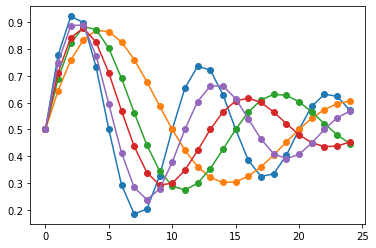

In [11]:
from math import sin, pi, exp
from random import randint, uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM, Dense


def generate_sequence(length, period, decay):
    return [0.5+0.5*sin(2*pi*i/period)*exp(-decay*i) for i in range(length)]

def generate_examples(length, n_patterns, output):
    X,y = list(),list()
    for _ in range(n_patterns):
        p=randint(10,20)
        d=uniform(0.01, 0.1)
        sequence=generate_sequence(length+output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X=array(X).reshape(n_patterns, length, 1)
    y=array(y).reshape(n_patterns, output)
    return X,y
    
X,y = generate_examples(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i,:,0]]+[x for x in y[i]], '-o')
pyplot.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_9 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0455
MAE: 0.028485


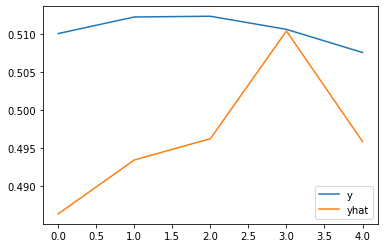

In [14]:
length=50
output=5

model=Sequential()
model.add(LSTM(20,return_sequences=True, input_shape=(length,1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
model.summary()

X,y=generate_examples(length, 10000, output)
history=model.fit(X,y, batch_size=10, epochs=1)

X,y=generate_examples(length,1000,output)
loss=model.evaluate(X,y, verbose=0)
print('MAE: %f' % loss)

X, y = generate_examples(length, 1, output)
yhat=model.predict(X,verbose=0)
pyplot.plot(y[0], label='y')
pyplot.plot(yhat[0], label='yhat')
pyplot.legend()
pyplot.show()

# Chapter 8: CNN LSTMs